original source & reference
 - https://kaggle-kr.tistory.com/17?category=868316#2_3
 - https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

# Titanic

In [3]:
# !pip install missingno

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore') # Turn off the warning message

%matplotlib inline

## 1. Load the dataset & check the summary statistics of the dataset

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Check the null data

In [12]:
for col in df_train.columns:
    # {:>10} 오른쪽 정렬
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [13]:
for col in df_test.columns:
    # {:>10} 오른쪽 정렬
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

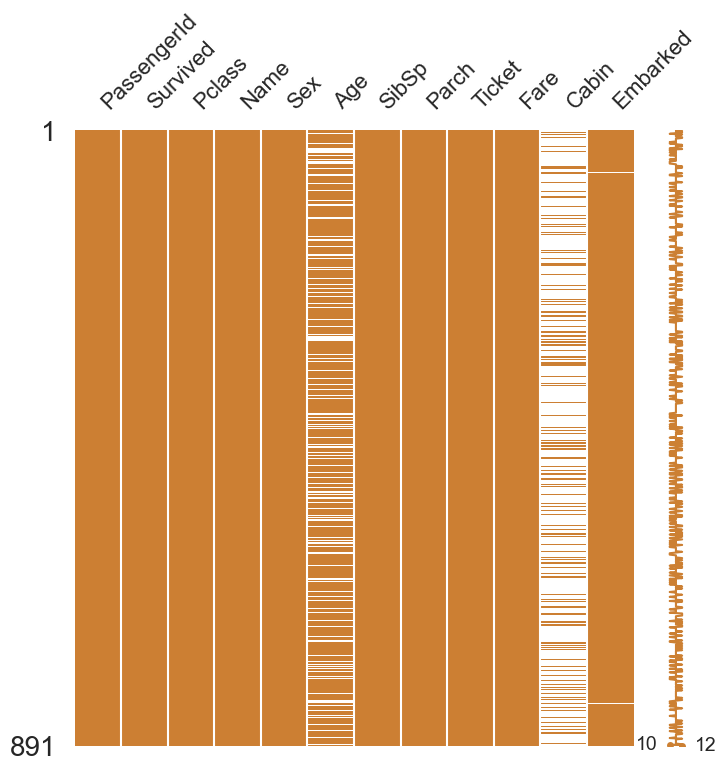

In [15]:
# easily check the null data
msno.matrix(df=df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

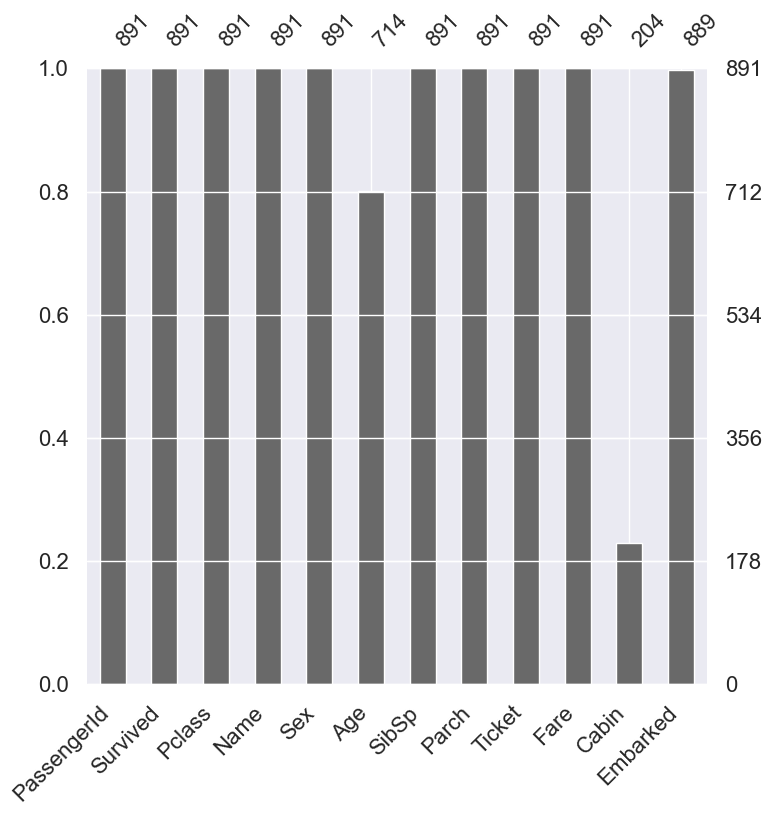

In [16]:
msno.bar(df=df_train, figsize=(8,8))

<AxesSubplot:>

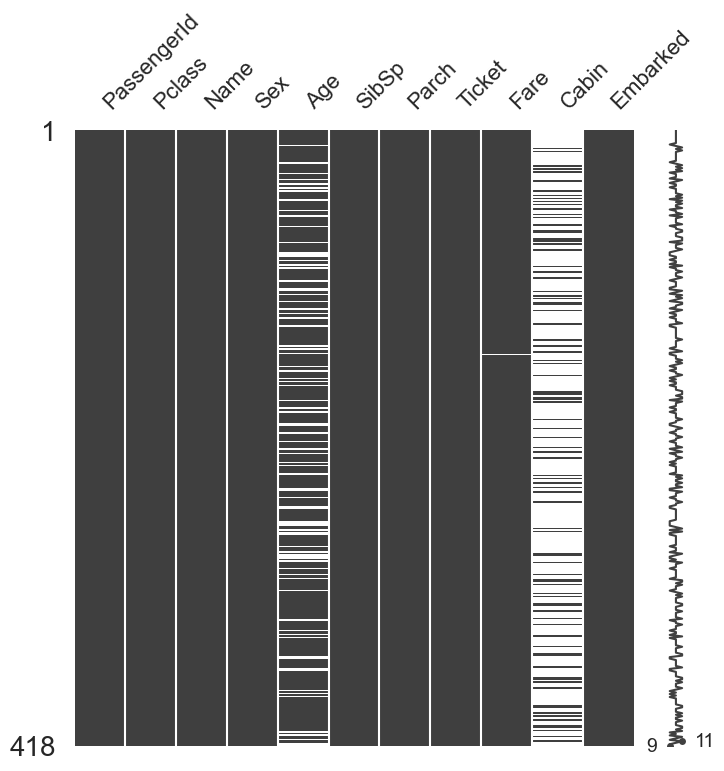

In [18]:
msno.matrix(df=df_test, figsize=(8,8))

<AxesSubplot:>

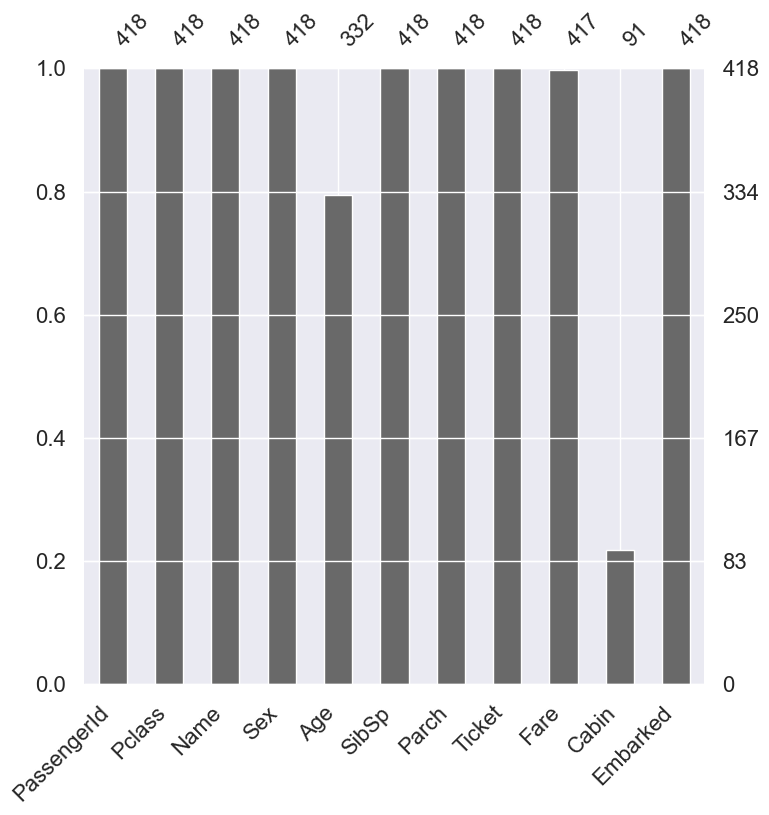

In [19]:
msno.bar(df=df_test, figsize=(8,8))

EDA on the target label

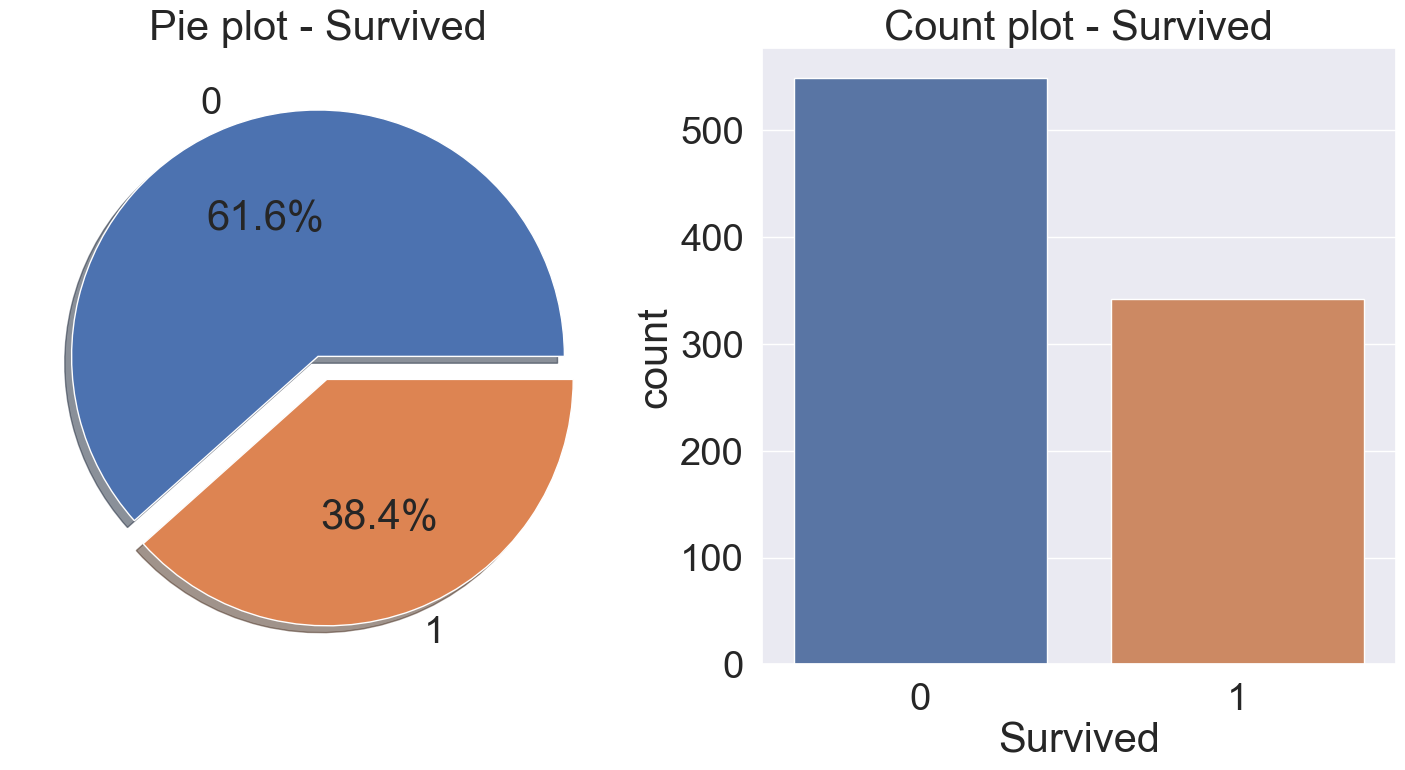

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2. EDA

Independent variable(IV)와 dependent variable(DV) 간의 관계를 이해하는 과정

In [31]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [32]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [36]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [37]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [38]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

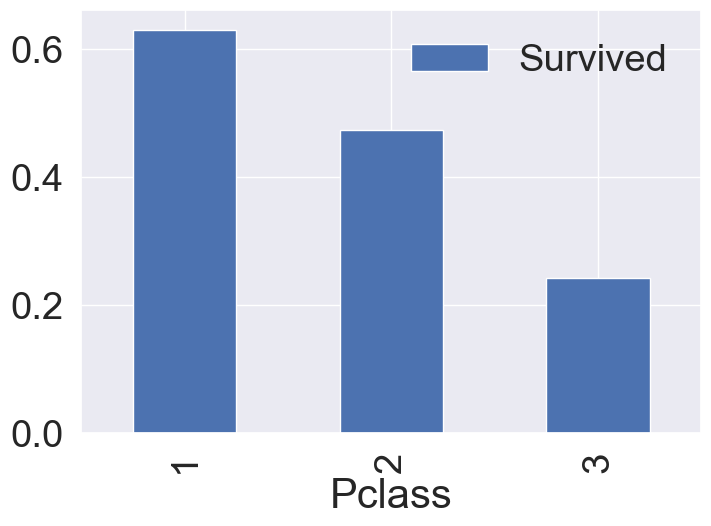

In [39]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

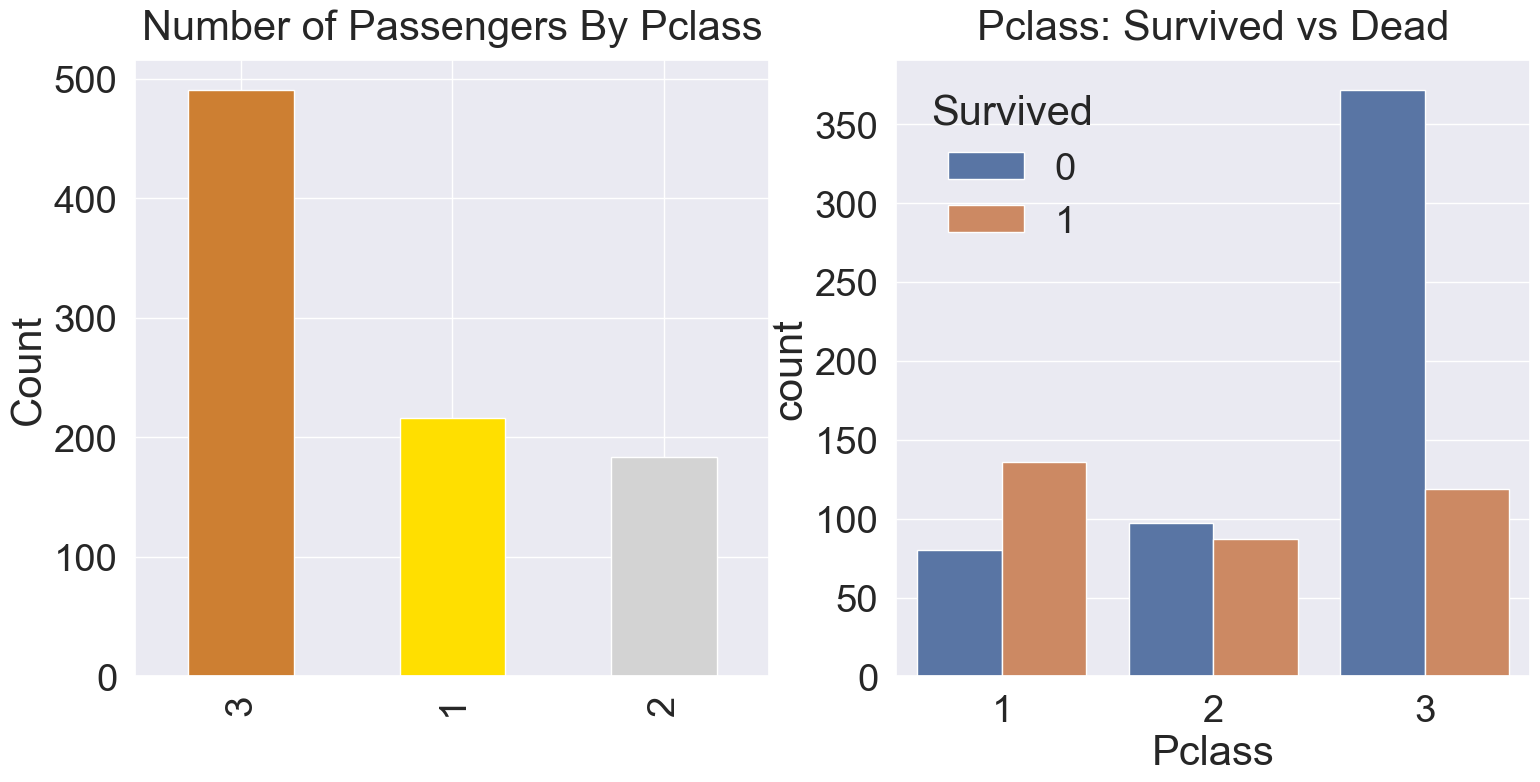

In [52]:
y_position = 1.02

f, ax = plt.subplots(1,2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
# ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_title('Number of Passengers By Pclass', y=y_position) # Title을 살짝 위로 더 밀었음
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) # hue 부분이 빠지면 1번 결과와 사실상 동일하다
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

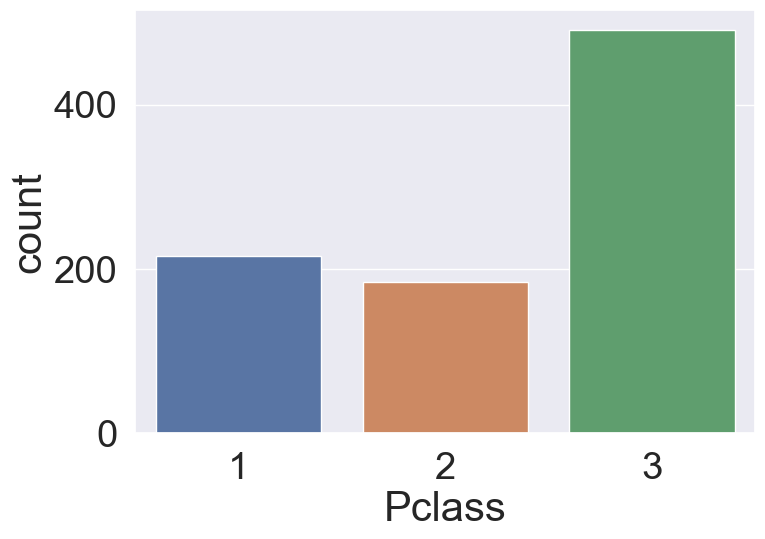

In [53]:
sns.countplot('Pclass', data=df_train)

결론: Pclass라는 IV가 DV와 강한 관계를 가지고 있음을 볼 수 있음 -> 유력한 feature 후보!

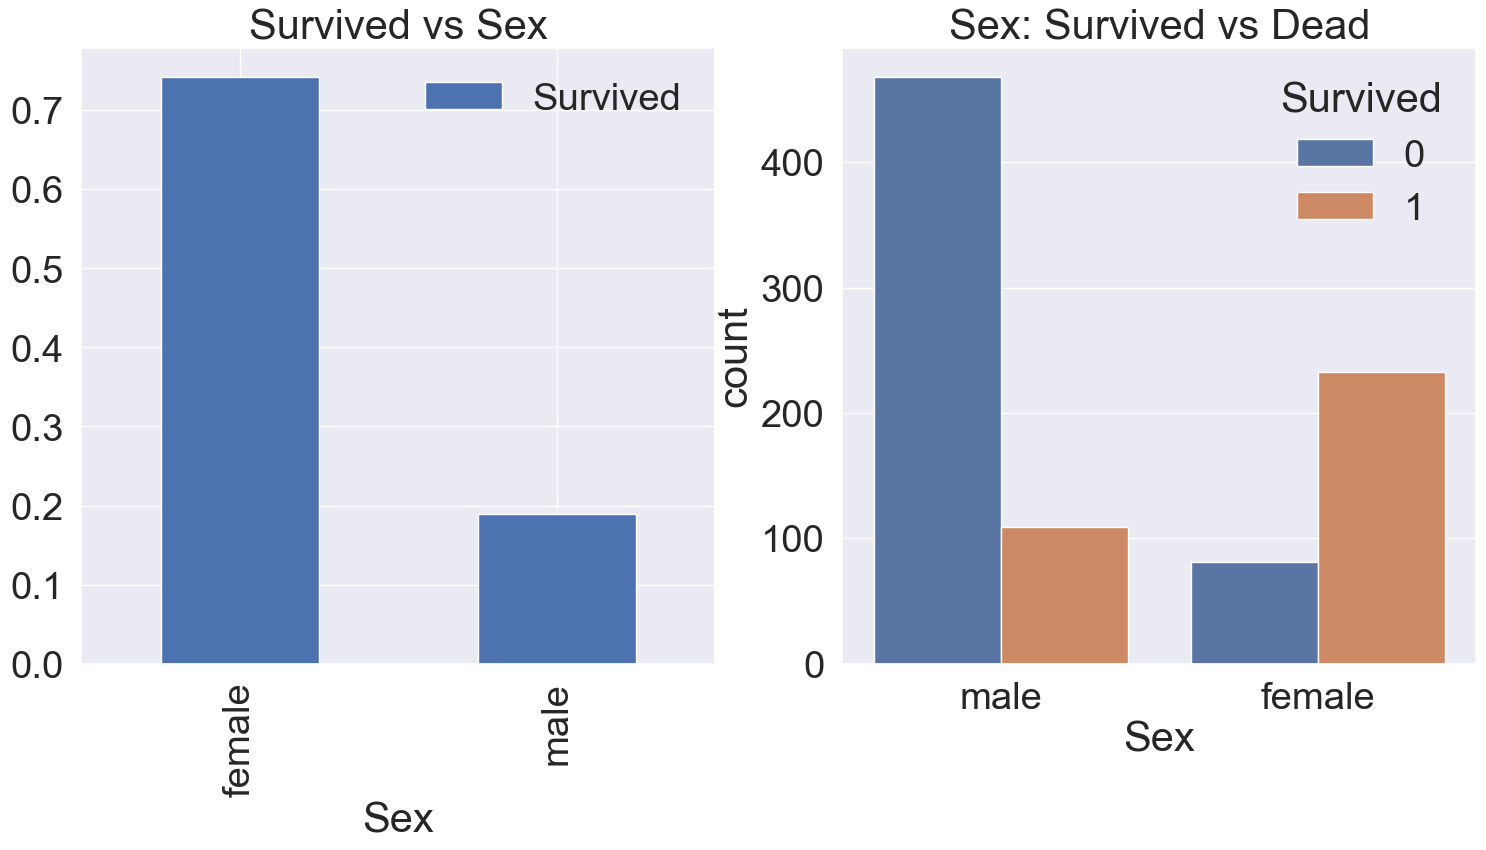

In [54]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [55]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [56]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


결론: Pclass 처럼 Sex도 DV에 대한 모델링 과정에서 중요한 feature가 될 것이라고 추측 가능함.

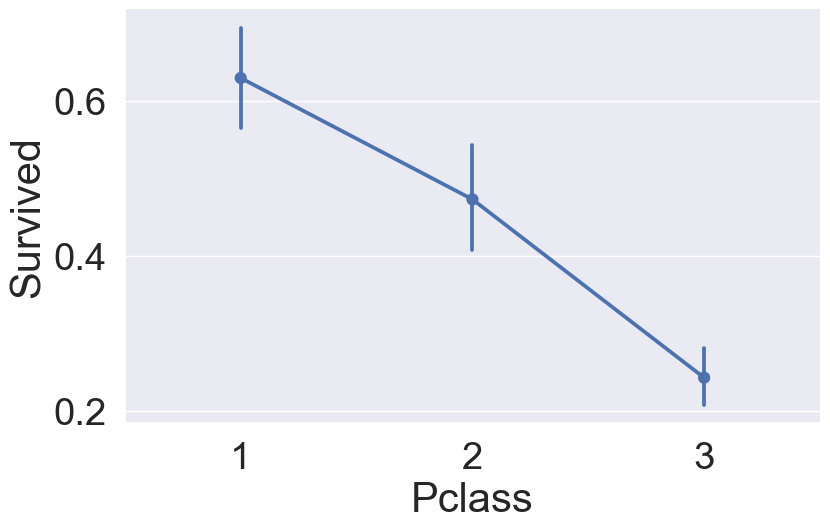

In [62]:
sns.factorplot('Pclass', 'Survived', data=df_train, height=6, aspect=1.5) # NOTE: 'size' argument is replace with 'height'

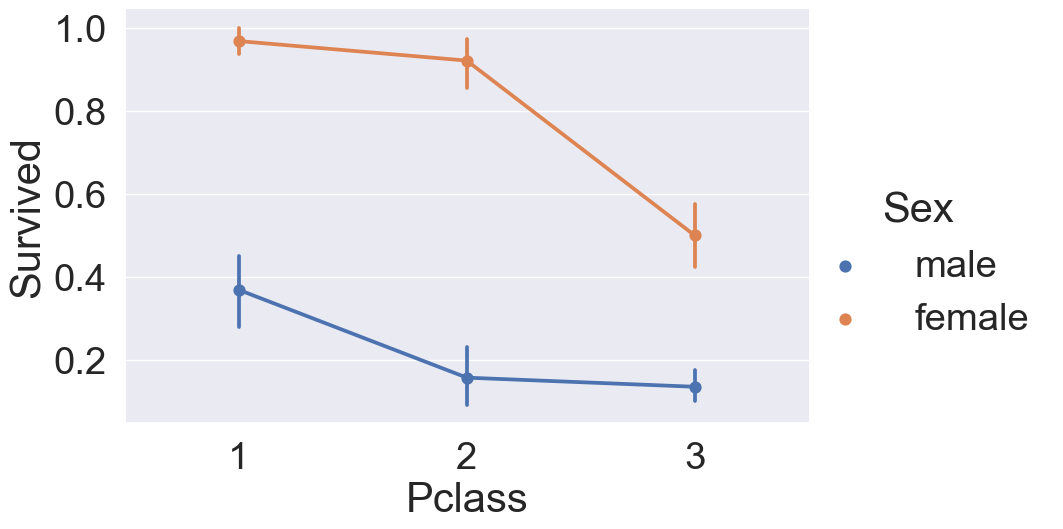

In [63]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, height=6, aspect=1.5) # NOTE: 'size' argument is replace with 'height'

Sex로 인해서 Pclass와 Survived간의 관계(우하향) 변화 X -> Pclass와 Sex간의 interaction을 고려해지 않아도 된다는 주장의 근거로 사용 가능함.

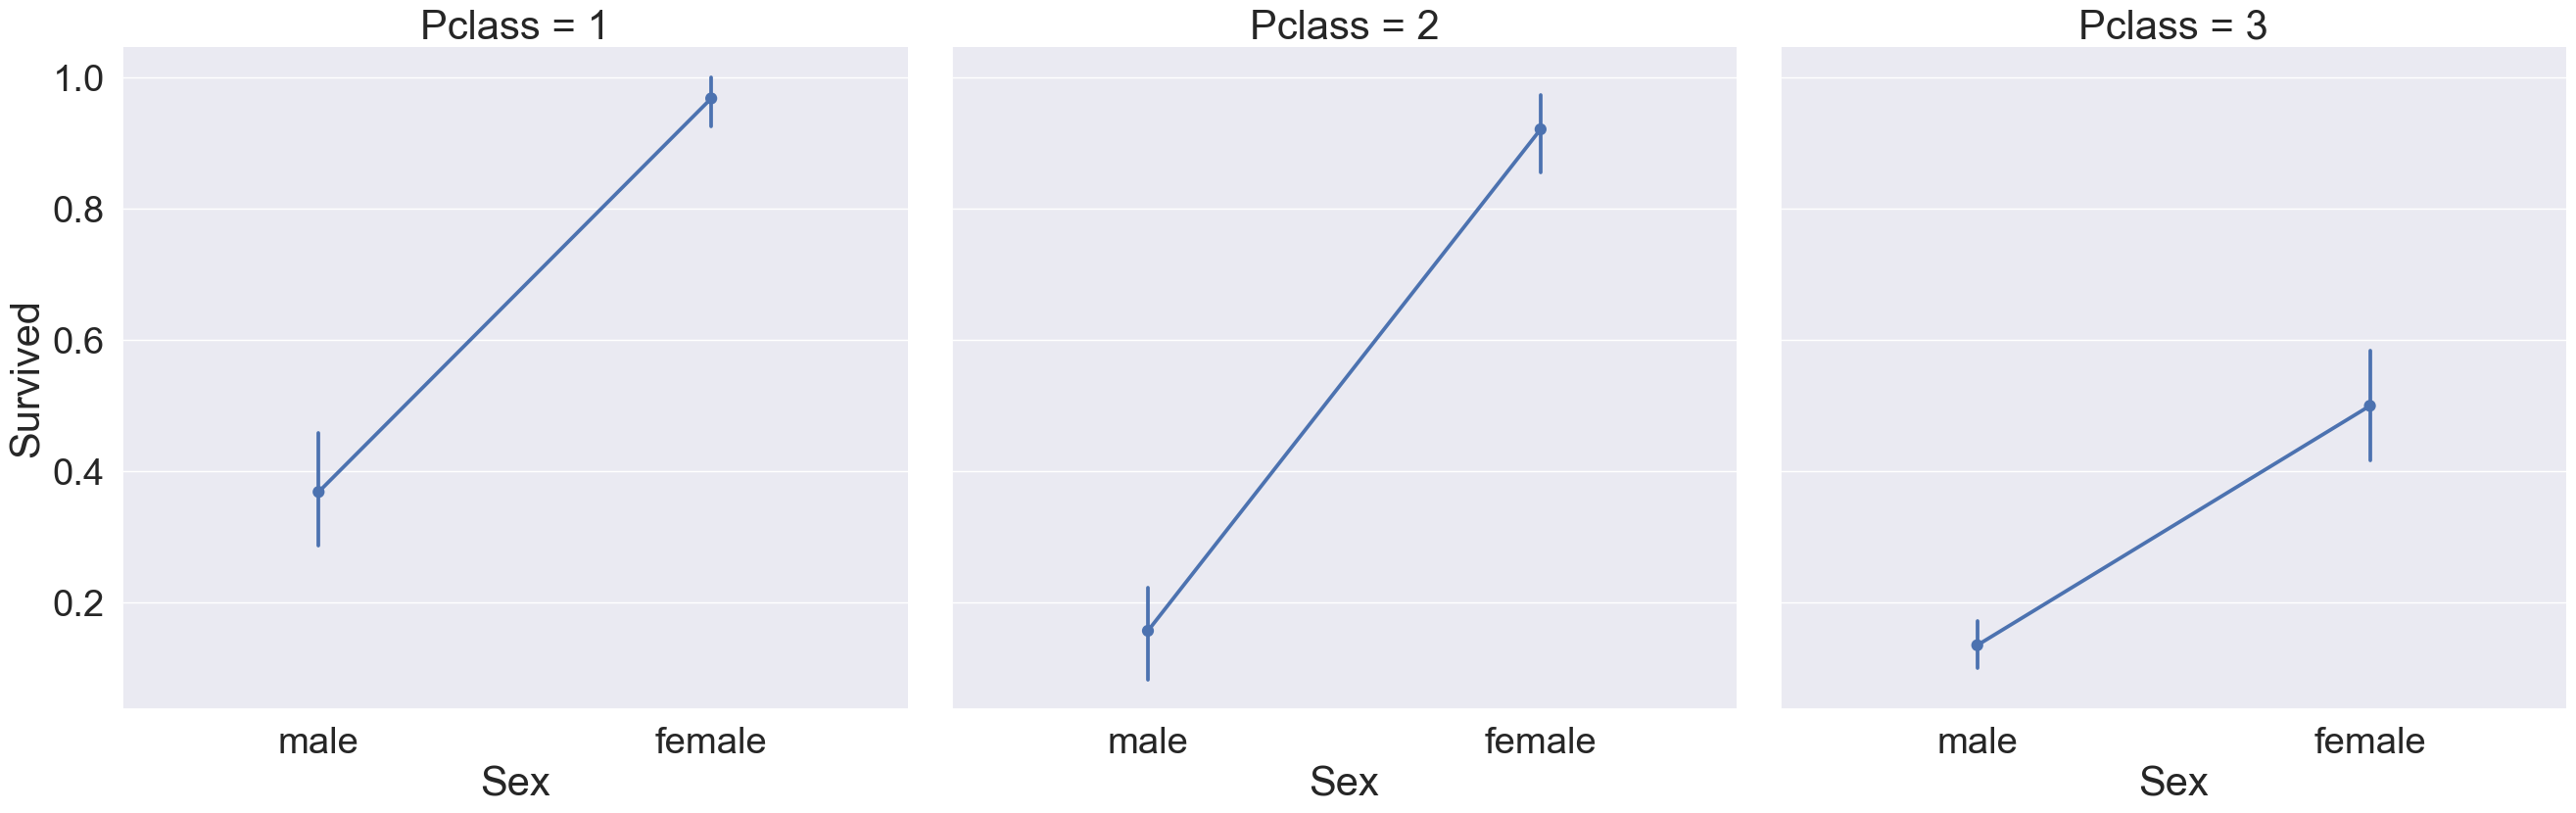

In [64]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train, height=9, aspect=1)

In [66]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

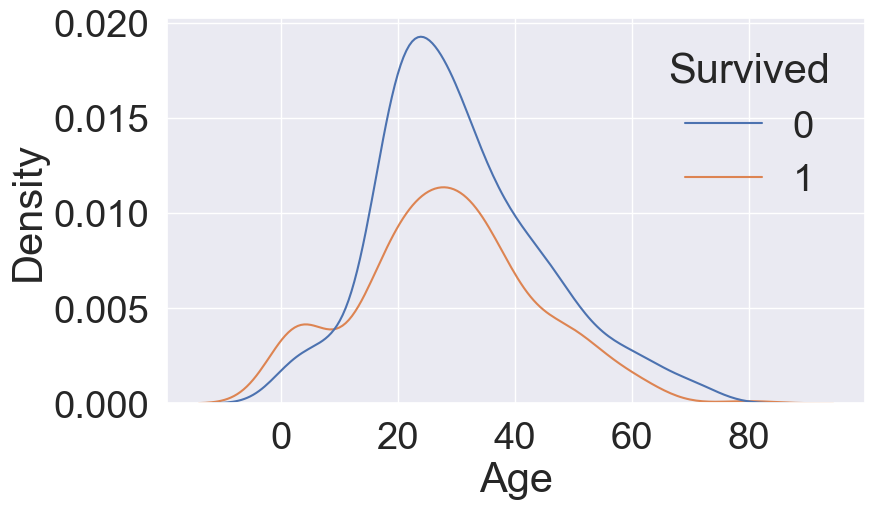

In [69]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(data=df_train, x='Age', hue='Survived')

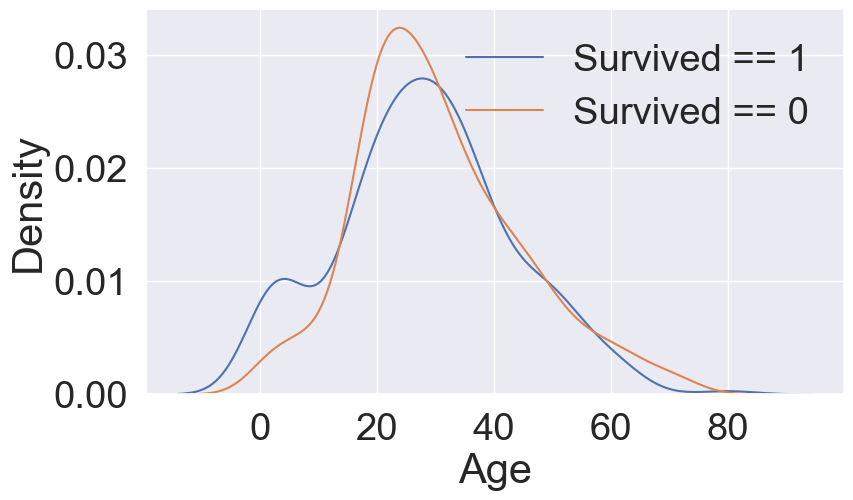

In [71]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax = ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

**TODO: 연령대별 생존자 비율 체크해보기** --> 나이대가 변하면서 생존률이 어떻게 변화하는지 체크하는 부분으로 연결

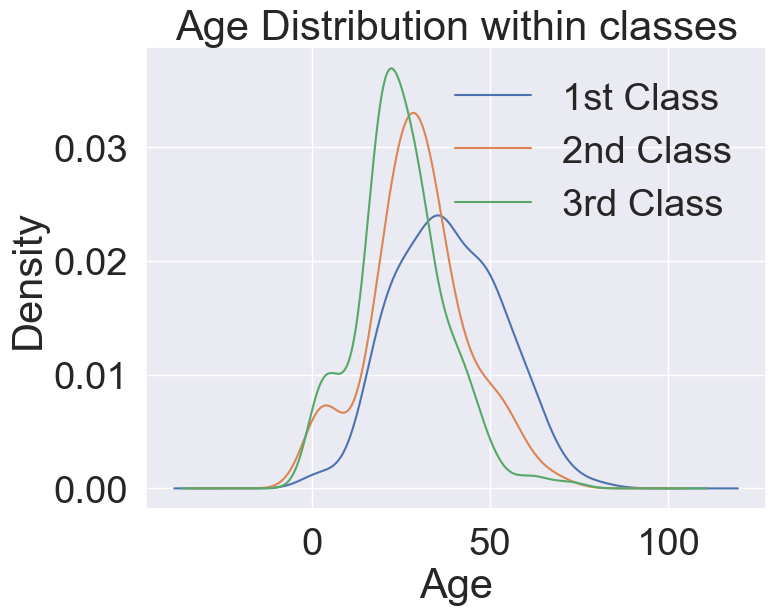

In [76]:
plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


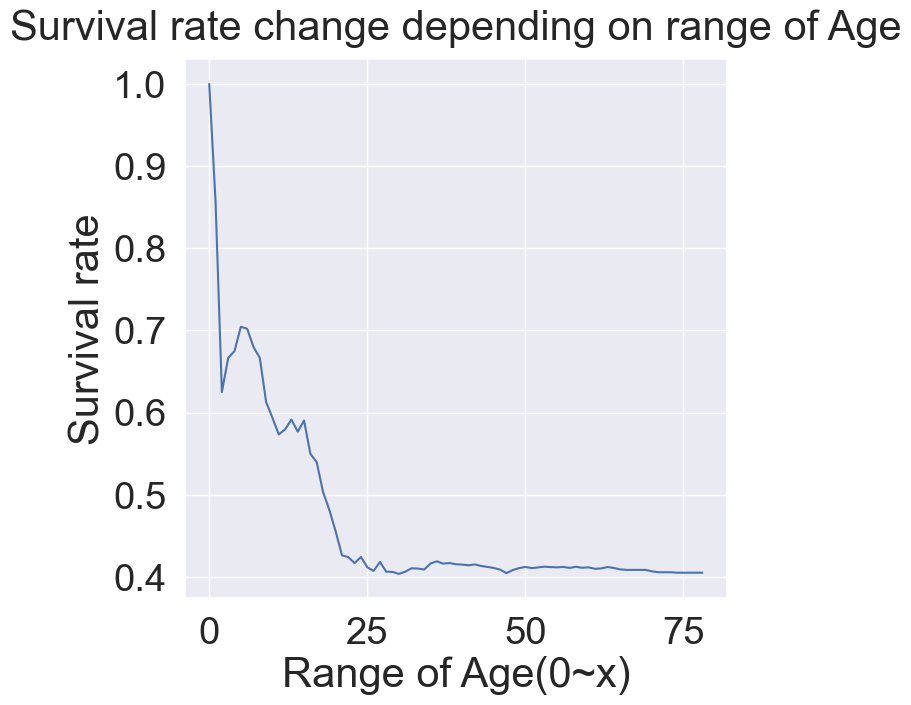

In [81]:
cum_survival_ratio = []
for i in range(1,80):
    cum_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
    
                              
plt.figure(figsize=(7, 7))
plt.plot(cum_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

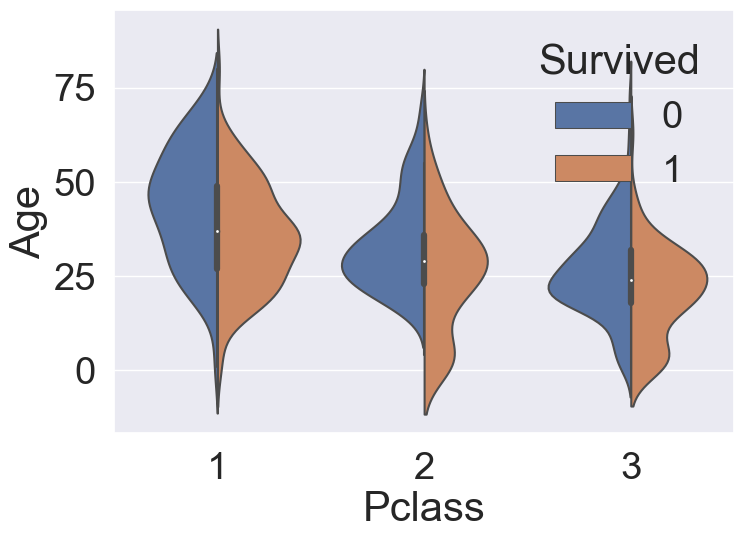

In [88]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='area', split=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

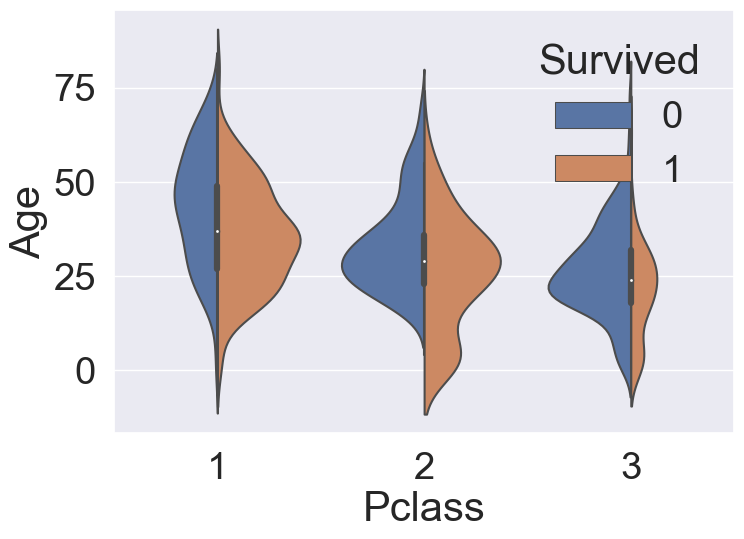

In [89]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

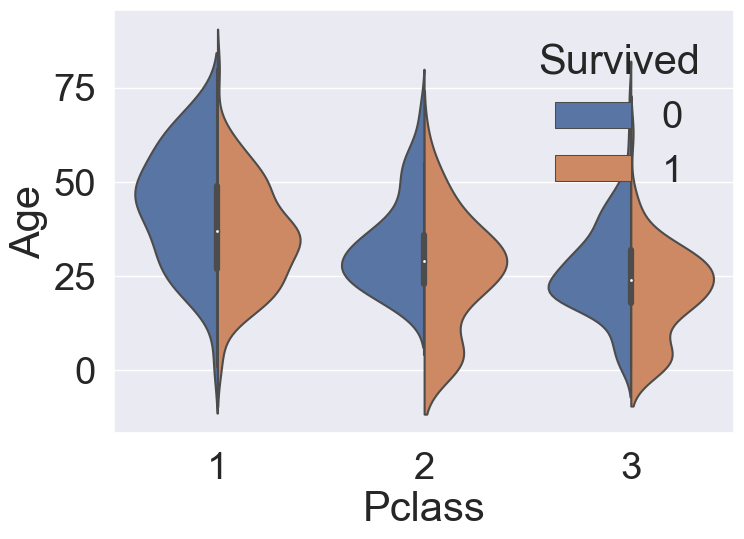

In [90]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='width', split=True)

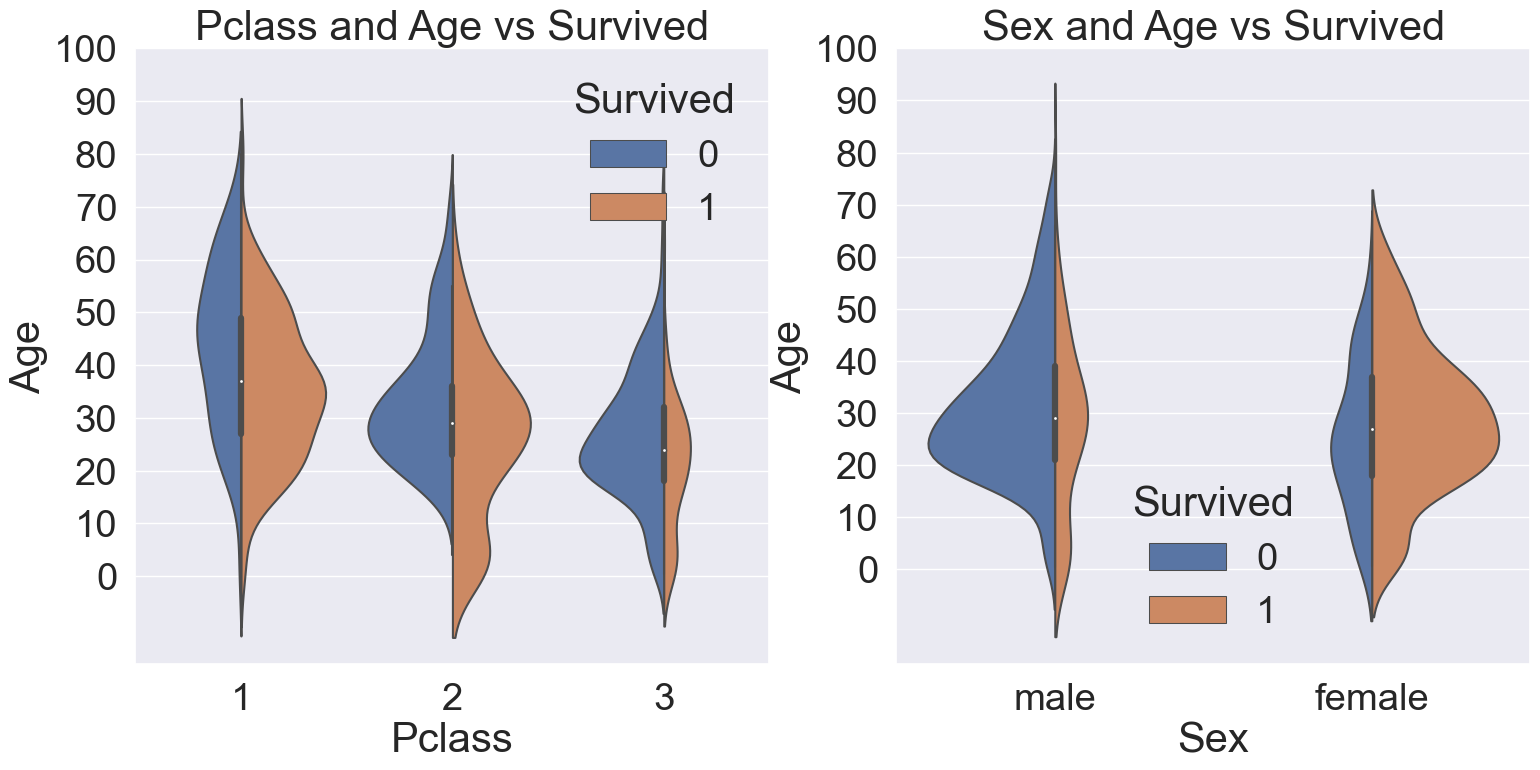

In [91]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])

ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

TODO: violin plot은 box plot의 심화형이라고 생각할 수도 있는데, 해석에 대해서는 좀 더 이해 필요함

<AxesSubplot:xlabel='Embarked'>

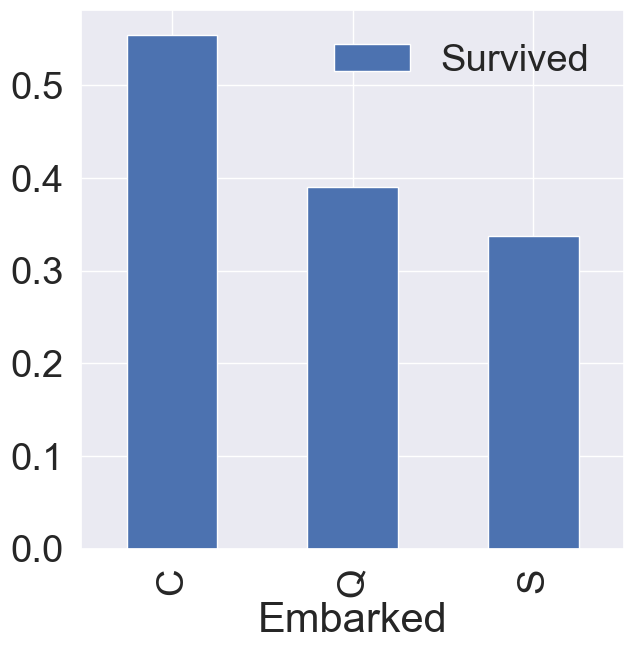

In [93]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby('Embarked', as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

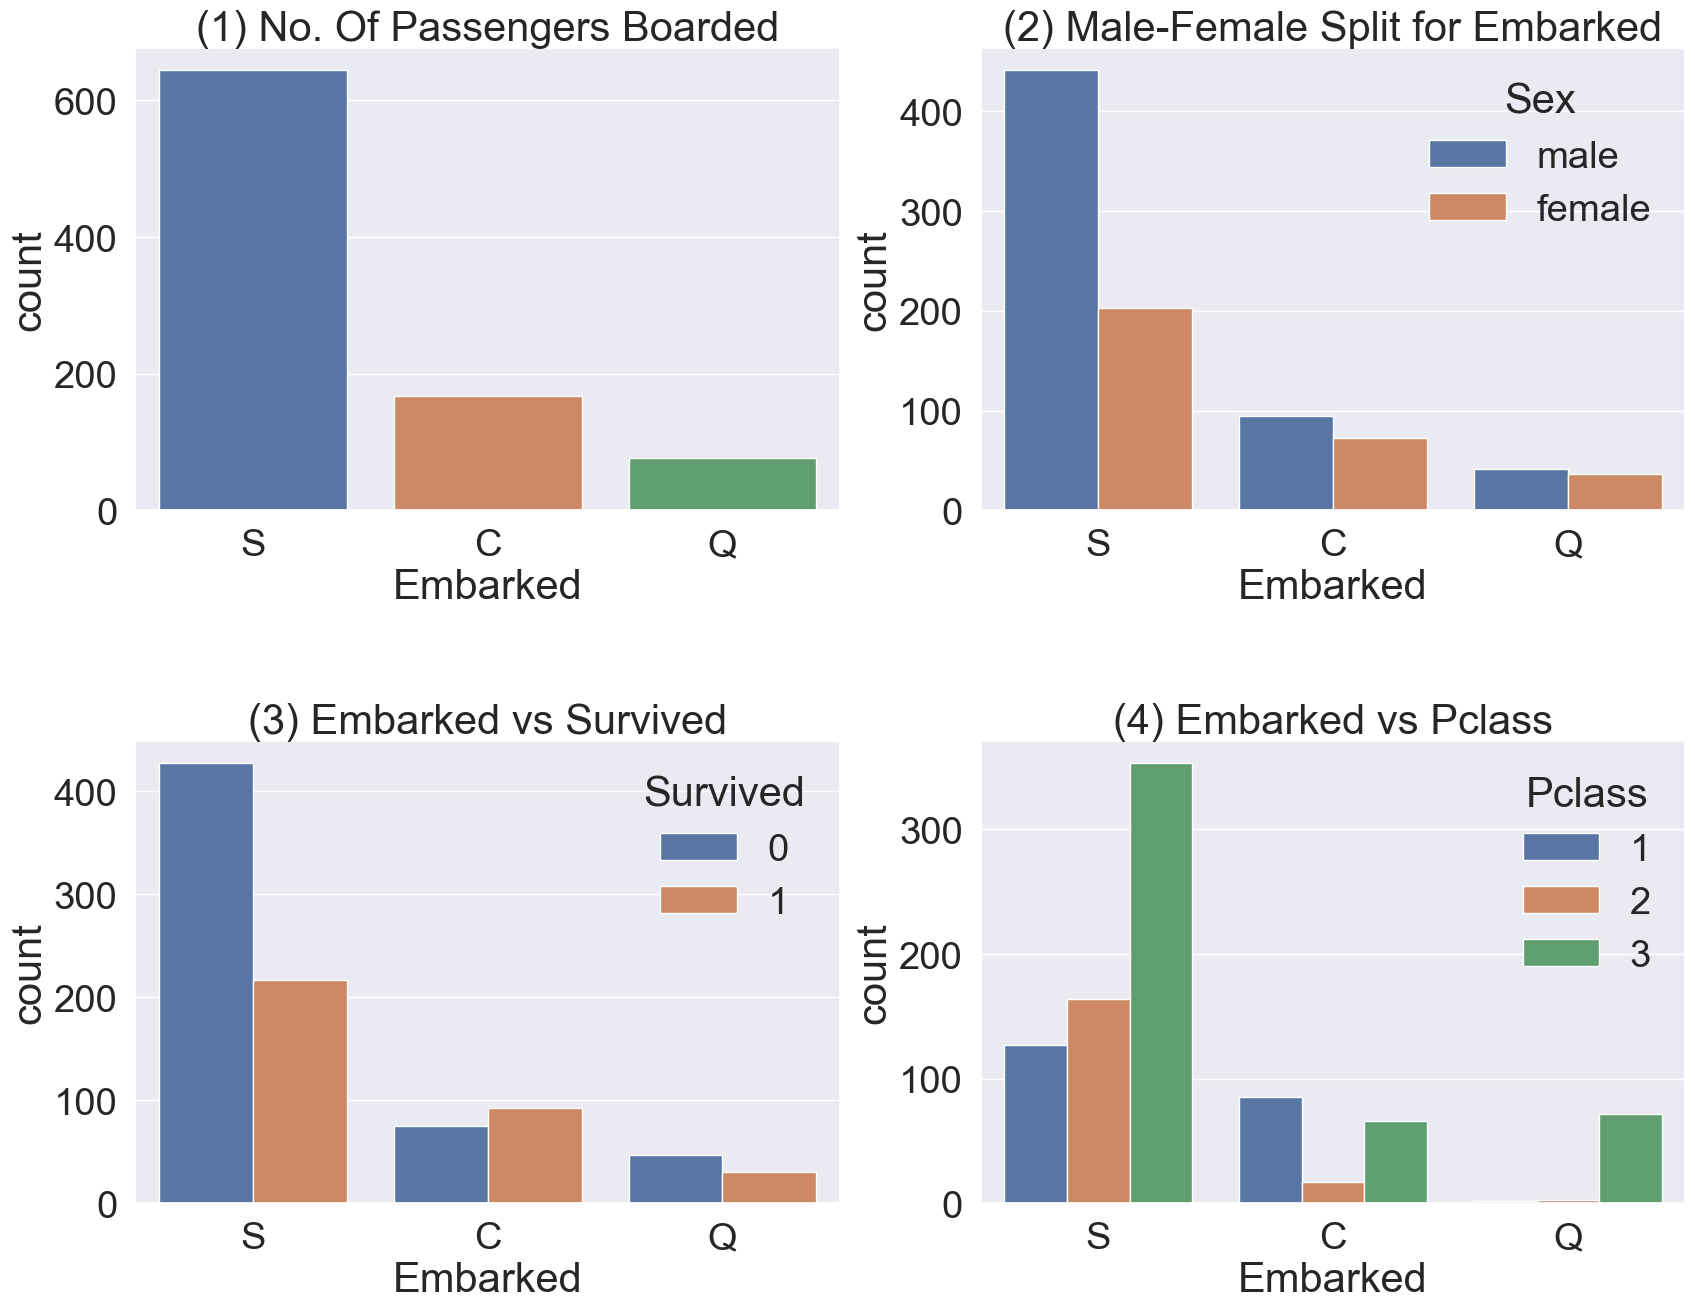

In [99]:
f, ax = plt.subplots(2,2,figsize=(20,15))

#1
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

#2
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

#3
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

#4
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) # To prevent overlaps of the below titles & upper x-labels
plt.show()

In [100]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']+1 # including self
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']+1 #including self

In [101]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())


Maximum size of Family:  11
Minimum size of Family:  1


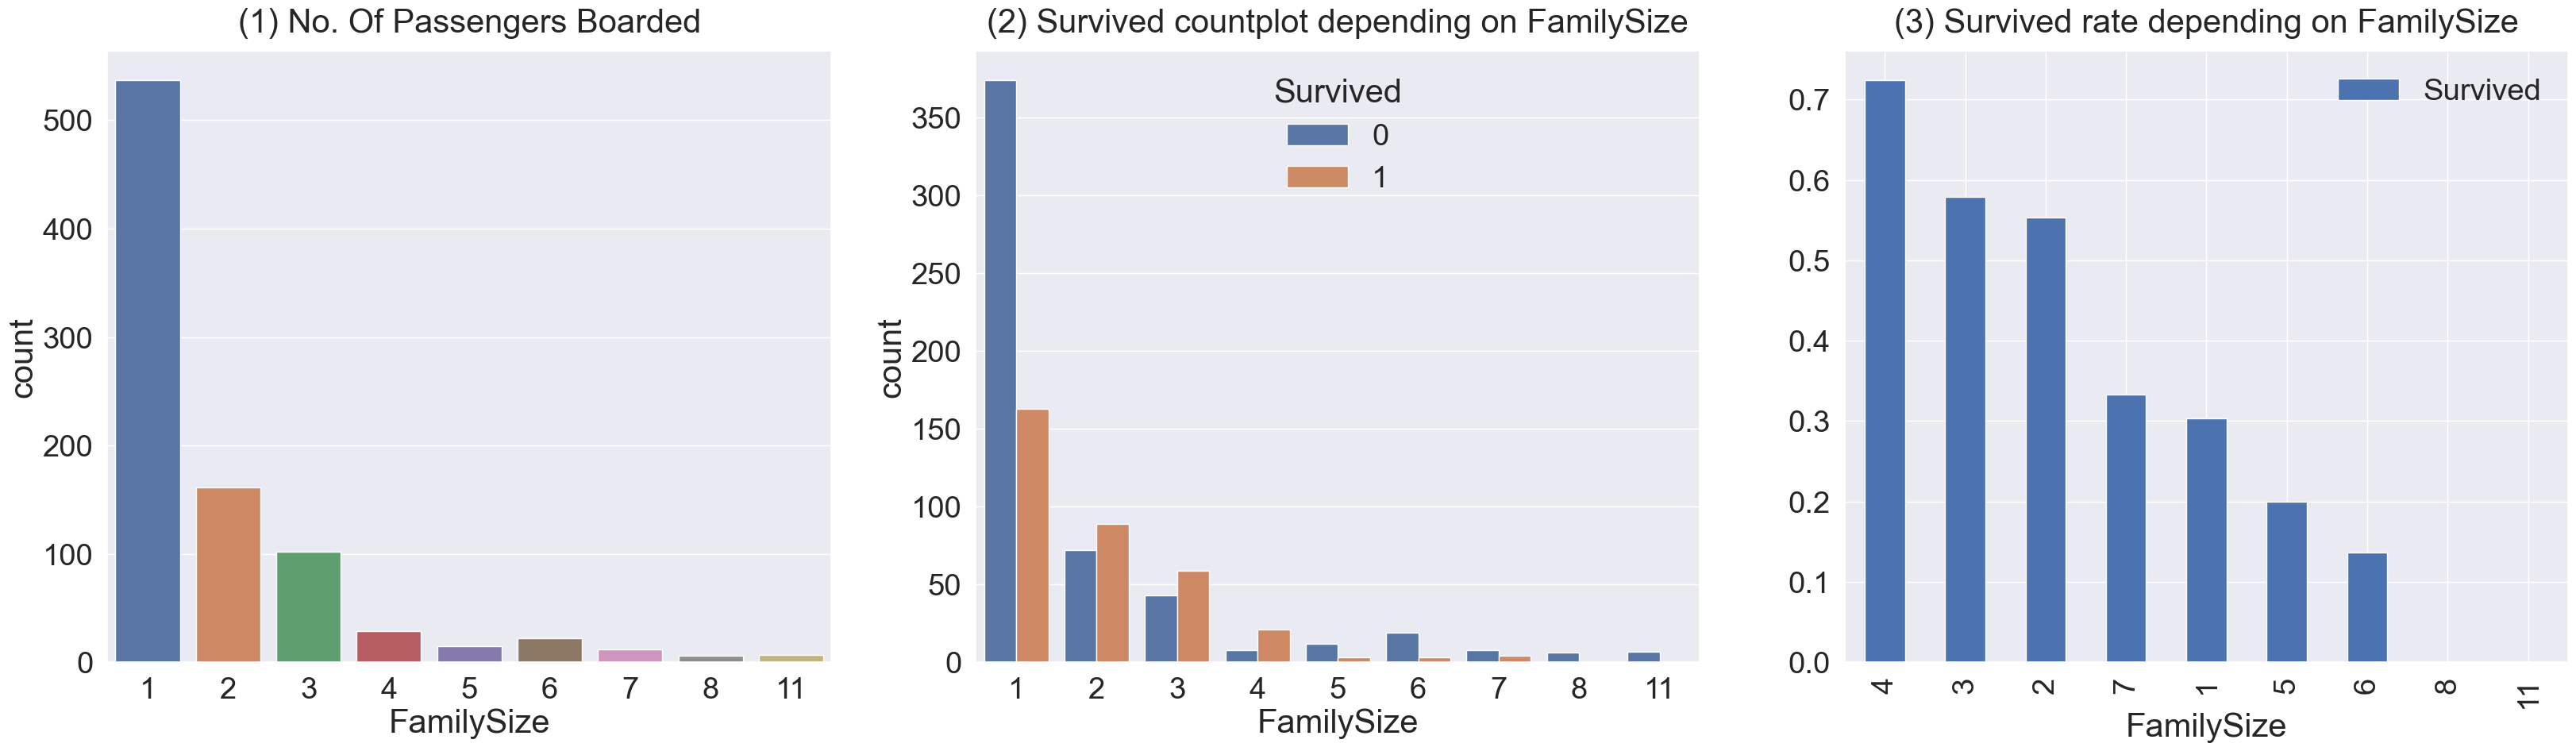

In [102]:
f, ax = plt.subplots(1,3,figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


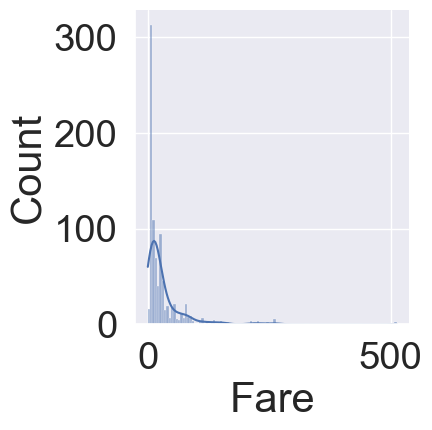

In [110]:
# fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.displot(df_train['Fare'], label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), kde=True, ax=ax) # Note: distplot -> deprecated

In [116]:
# Impute the missing vals.
print(df_test.loc[df_test.Fare.isnull()])
print("*********")
print(df_test.loc[df_test.Fare.isnull(), 'Fare'])
print("*********")

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  FamilySize  
152   NaN   NaN        S           1  
*********
152   NaN
Name: Fare, dtype: float64
*********


In [117]:
# Apply log-transformation on the IV 'Fare'

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

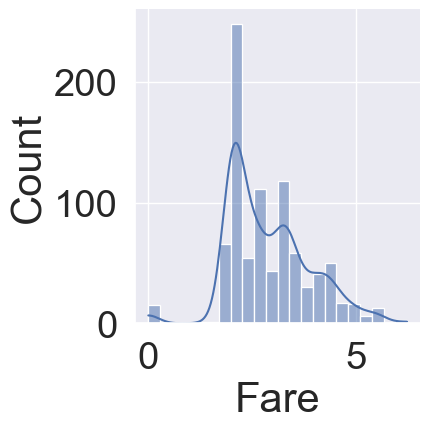

In [118]:
# fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.displot(df_train['Fare'], label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), kde=True, ax=ax) # Note: distplot -> deprecated

In [124]:
df_train['Cabin'].isnull().sum()/len(df_train['Cabin']) # -> Exclude the IV 'Cabin' for the modelling

0.7710437710437711

In [125]:
df_train['Ticket'][:10]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [127]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

**Check the correlation btn the features**

In [131]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,-0.006970,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.331805,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.670489,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.117585,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.323214,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.336857,0.783111
Fare,-0.006970,0.331805,-0.670489,0.117585,0.323214,0.336857,1.000000,0.389193
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.389193,1.000000


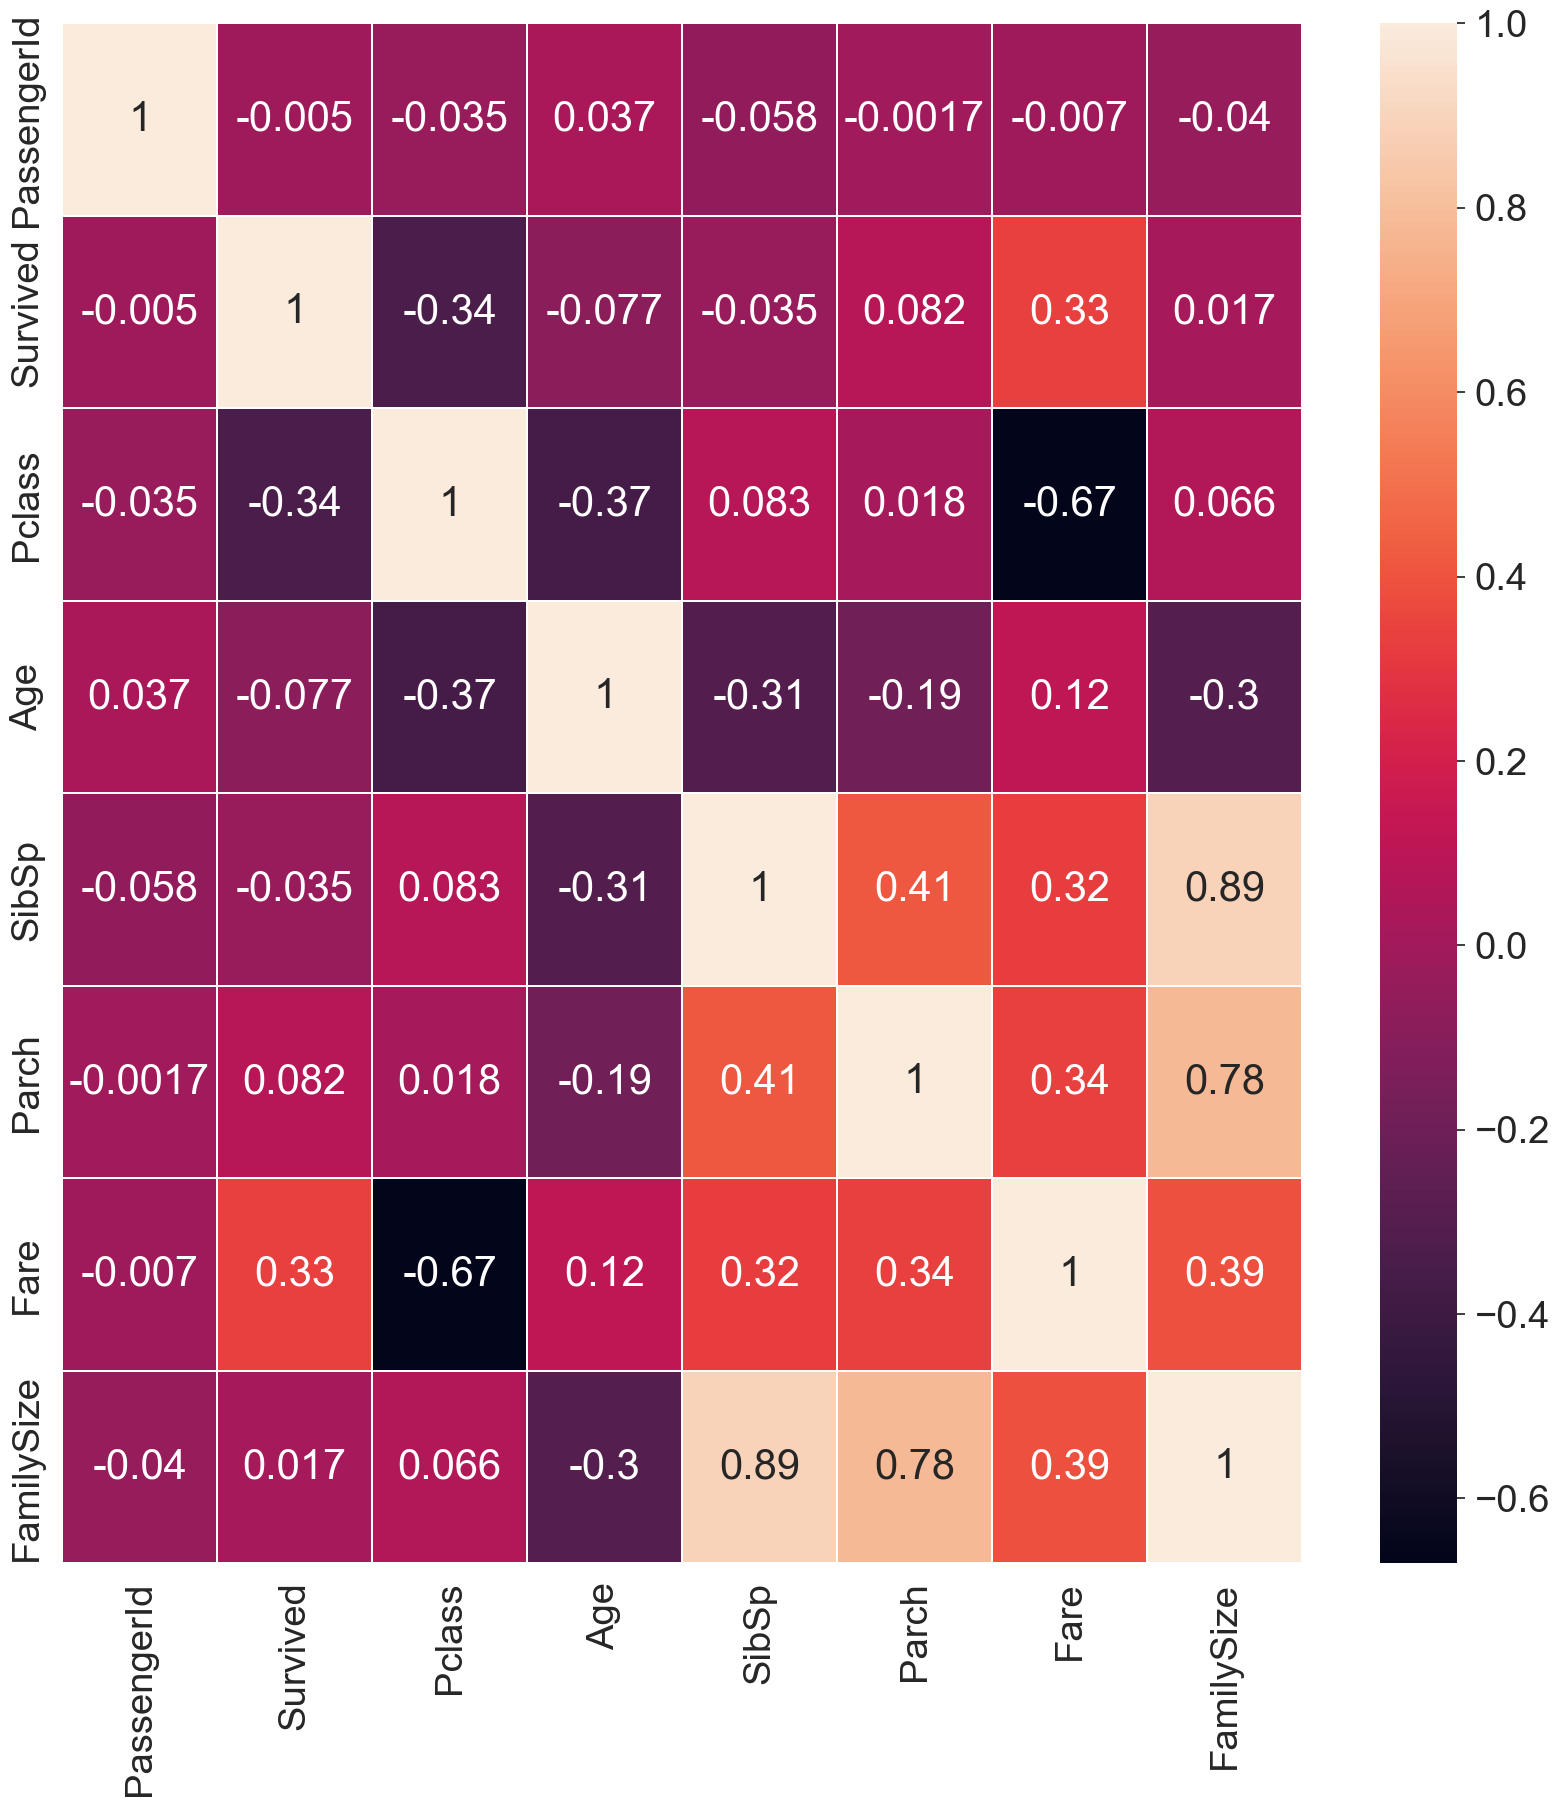

In [140]:
fig, ax = plt.subplots(1,1,figsize=(20,20))

sns.heatmap(df_train.corr(), annot=True, linewidths=0.2, ax=ax)
plt.show()

## 3. Feature Engineering

In [146]:
# Create Age_band column

df_train['Age_band']=0
print(df_train.head())

df_train.loc[df_train['Age'] <= 16, 'Age_band'] = 0
df_train.loc[df_train['Age'] > 16, 'Age_band'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <=48), 'Age_band'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 65), 'Age_band'] = 3
df_train.loc[df_train['Age'] > 65, 'Age_band'] = 4

print(df_train.head())

#####

df_test['Age_band']=0
print(df_test.head())

df_test.loc[df_test['Age'] <= 16, 'Age_band'] = 0
df_test.loc[df_test['Age'] > 16, 'Age_band'] = 1
df_test.loc[(df_test['Age'] > 32) & (df_test['Age'] <=48), 'Age_band'] = 2
df_test.loc[(df_test['Age'] > 48) & (df_test['Age'] <= 65), 'Age_band'] = 3
df_test.loc[df_test['Age'] > 65, 'Age_band'] = 4

print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket      Fare Cabin Embarked  FamilySize  Age_band  
0      0         A/5 21171  1.981001   NaN        S           2         0  
1      0          PC 17599  4.266662   C85        C           2         0  
2      0  STON/O2. 3101282  2.070022   NaN        S           1         0  
3      0        

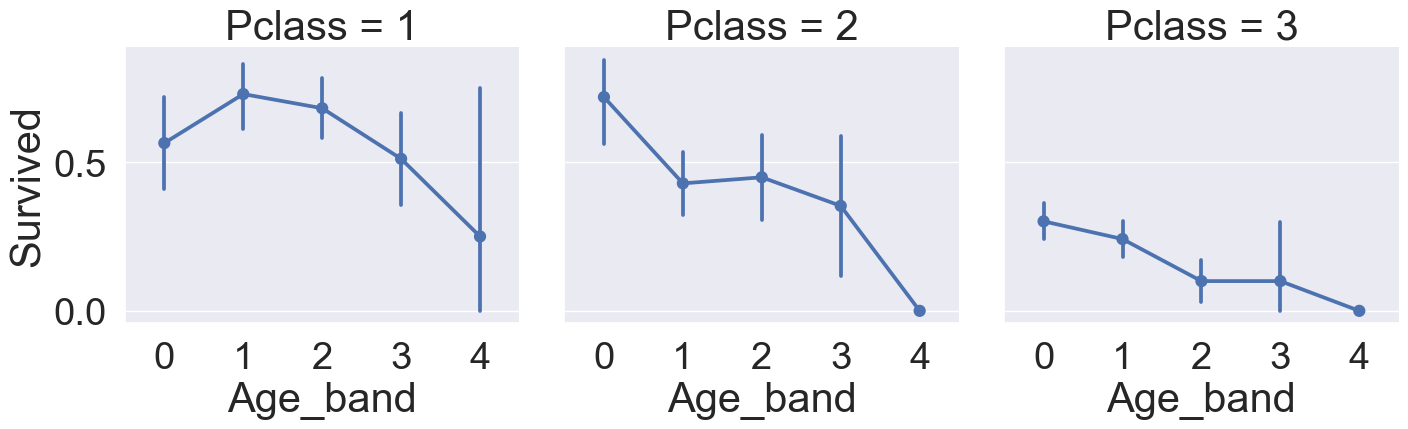

In [148]:
sns.factorplot('Age_band','Survived',data=df_train,col='Pclass')
plt.show()

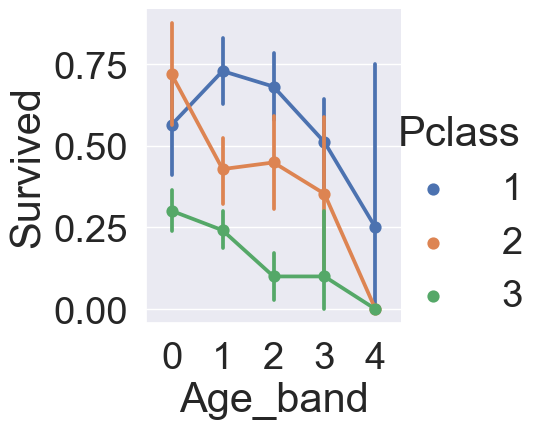

In [150]:
sns.factorplot('Age_band','Survived',data=df_train,hue='Pclass')
plt.show()

In [152]:
df_train['Fare'][:10]

0    1.981001
1    4.266662
2    2.070022
3    3.972177
4    2.085672
5    2.135148
6    3.948596
7    3.048088
8    2.409941
9    3.403555
Name: Fare, dtype: float64

In [153]:
df_train['Fare'].describe()

count    891.000000
mean       2.893846
std        1.002899
min        0.000000
25%        2.068177
50%        2.670985
75%        3.433987
max        6.238967
Name: Fare, dtype: float64

In [156]:
df_train['Fare_Range'] = pd.qcut(df_train['Fare'],4)
print(df_train[['Fare', 'Fare_Range']])

         Fare       Fare_Range
0    1.981001  (-0.001, 2.068]
1    4.266662   (3.434, 6.239]
2    2.070022   (2.068, 2.671]
3    3.972177   (3.434, 6.239]
4    2.085672   (2.068, 2.671]
..        ...              ...
886  2.564949   (2.068, 2.671]
887  3.401197   (2.671, 3.434]
888  3.154870   (2.671, 3.434]
889  3.401197   (2.671, 3.434]
890  2.047693  (-0.001, 2.068]

[891 rows x 2 columns]


In [158]:
df_train.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 2.068]    0.197309
(2.068, 2.671]     0.303571
(2.671, 3.434]     0.454955
(3.434, 6.239]     0.581081
Name: Survived, dtype: float64

In [159]:
df_train.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 2.068]",0.197309
"(2.068, 2.671]",0.303571
"(2.671, 3.434]",0.454955
"(3.434, 6.239]",0.581081


In [160]:
df_train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 2.068]",0.197309
"(2.068, 2.671]",0.303571
"(2.671, 3.434]",0.454955
"(3.434, 6.239]",0.581081


In [164]:
print(df_train[['Sex', 'Embarked']])

df_train['Sex'] = df_train['Sex'].replace(['male', 'female'], [0, 1])
df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'], [0,1,2])

print(df_train[['Sex', 'Embarked']])


        Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]
     Sex  Embarked
0      0       0.0
1      1       1.0
2      1       0.0
3      1       0.0
4      0       0.0
..   ...       ...
886    0       0.0
887    1       0.0
888    1       0.0
889    0       1.0
890    0       2.0

[891 rows x 2 columns]


# TODO: Start from the modelling
https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook